In [1]:
print("Hello world")

Hello world


In [2]:
# import necessary modules
import requests
import matplotlib.pyplot as plt
import cv2

In [3]:
# image to detect object
image_name = "app/sample_image/4.png"

# prepar params
image_data = {'image': ('4.png', open(image_name, 'rb'))}
class_id = 0
query_params = {"conf": 0.5, "device": "cpu"}

# call api
detect = requests.post("http://localhost:5000/api/v1/detect/0", files=image_data, params=query_params)
detected_objects = detect.json()["object"]
detected_objects

[{'bbox': {'x1': 336, 'y1': 82, 'x2': 409, 'y2': 258},
  'label': 'person',
  'conf': 0.87},
 {'bbox': {'x1': 387, 'y1': 66, 'x2': 446, 'y2': 256},
  'label': 'person',
  'conf': 0.84},
 {'bbox': {'x1': 80, 'y1': 66, 'x2': 102, 'y2': 121},
  'label': 'person',
  'conf': 0.67},
 {'bbox': {'x1': 433, 'y1': 57, 'x2': 480, 'y2': 215},
  'label': 'person',
  'conf': 0.55}]

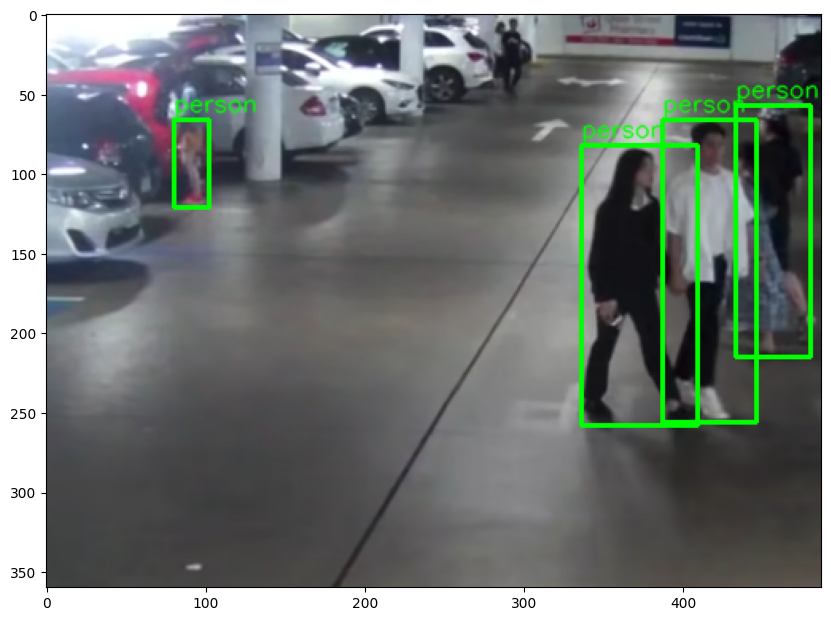

In [4]:
# plot detected result on image
image = cv2.imread(image_name)
for obj in detected_objects:
    x1 = obj["bbox"]["x1"]
    y1 = obj["bbox"]["y1"]
    x2 = obj["bbox"]["x2"]
    y2 = obj["bbox"]["y2"]
    color = (0, 255, 0) # GREEN
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, f"{obj['label']}", (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))